# Lesson 1: Download and Install Python and SciPy

In [6]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.0 (tags/v3.8.0:fa919fd, Oct 14 2019, 19:21:23) [MSC v.1916 32 bit (Intel)]
scipy: 1.4.1
numpy: 1.18.0
matplotlib: 3.1.2
pandas: 0.25.3
sklearn: 0.22.2.post1


# Lesson 2: Get Around In Python, NumPy, Matplotlib and Pandas.

In [14]:
import numpy 
import pandas 
myarray = numpy.array([[1,2,3],[4,5,6]])
rownames = ['a','b']
colnames =['one','two','three']
mydataframe = pandas.DataFrame(myarray, index=rownames, columns=colnames)
print(mydataframe)

   one  two  three
a    1    2      3
b    4    5      6


# Lesson 3: Load Data From CSV

In [22]:
import pandas as pd 
url =url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg','plas','pres','skin','test','mass','pedi','age','class']
data = pd.read_csv(url,names=names)
print(data.shape)

(768, 9)


# Lesson 4: Understand Data with Descriptive Statistics

In [23]:
#Statistical Summary  
import pandas 
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data = pandas.read_csv(url, names=names)
description = data.describe()
print (data.shape)
print('-----------------------------------------------')
print(description)

(768, 9)
-----------------------------------------------
             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.00

# Lesson 5: Understand Data with Visualization
Use the hist() function to create a histogram of each attribute.
Use the plot(kind=’box’) function to create box-and-whisker plots of each attribute.
Use the pandas.scatter_matrix() function to create pairwise scatterplots of all attributes.

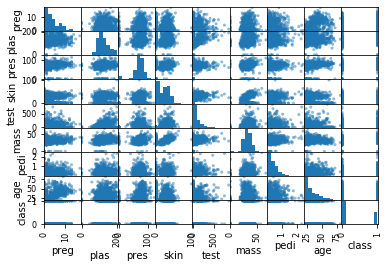

In [28]:
#Scatter plot matrix  
import matplotlib.pyplot as plt
import pandas 

from pandas.plotting import scatter_matrix

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = pandas.read_csv (url, names=names)
scatter_matrix(data)
plt.show()

# Lesson 6: Prepare For Modeling by Pre-Processing Data
The scikit-learn library provides two standard idioms for transforming data. Each transform is useful in different circumstances: Fit and Multiple Transform and Combined Fit-And-Transform.

There are many techniques that you can use to prepare your data for modeling. For example, try out some of the following

Standardize numerical data (e.g. mean of 0 and standard deviation of 1) using the scale and center options.
Normalize numerical data (e.g. to a range of 0-1) using the range option.
Explore more advanced feature engineering such as Binarizing.

In [31]:
#standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
import pandas 
import numpy
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe= pandas.read_csv(url, names=names)

array = dataframe.values

#separate array into input and output components 
X = array [:,0:8]
Y = array [:,8]

scaler = StandardScaler().fit(X) 

rescaledX = scaler.transform(X)

#summerize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


# Lesson 7: Algorithm Evaluation With Resampling Methods
The dataset used to train a machine learning algorithm is called a training dataset. The dataset used to train an algorithm cannot be used to give you reliable estimates of the accuracy of the model on new data. This is a big problem because the whole idea of creating the model is to make predictions on new data.
Split a dataset into training and test sets.
Estimate the accuracy of an algorithm using k-fold cross validation.
Estimate the accuracy of an algorithm using leave one out cross validation.

In [43]:
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state= 7)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)

Accuracy: %.3f%% (%.3f%%)


c:\users\mb250869\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


TypeError: unsupported operand type(s) for %: 'NoneType' and 'tuple'

# Lesson 8: Algorithm Evaluation Metrics
There are many different metrics that you can use to evaluate the skill of a machine learning algorithm on a dataset.

You can specify the metric used for your test harness in scikit-learn via the cross_validation.cross_val_score() function and defaults can be used for regression and classification problems. Your goal with today’s lesson is to practice using the different algorithm performance metrics available in the scikit-learn package.

Practice using the Accuracy and LogLoss metrics on a classification problem.
Practice generating a confusion matrix and a classification report.
Practice using RMSE and RSquared metrics on a regression problem.

In [44]:
# Cross Validation Classification LogLoss
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='liblinear')
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)") % (results.mean(), results.std())

Logloss: %.3f (%.3f)


c:\users\mb250869\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


TypeError: unsupported operand type(s) for %: 'NoneType' and 'tuple'

# Lesson 9: Spot-Check Algorithms
You cannot possibly know which algorithm will perform best on your data beforehand.

You have to discover it using a process of trial and error. I call this spot-checking algorithms. The scikit-learn library provides an interface to many machine learning algorithms and tools to compare the estimated accuracy of those algorithms.

In this lesson, you must practice spot checking different machine learning algorithms.

Spot check linear algorithms on a dataset (e.g. linear regression, logistic regression and linear discriminate analysis).
Spot check some non-linear algorithms on a dataset (e.g. KNN, SVM and CART).
Spot-check some sophisticated ensemble algorithms on a dataset (e.g. random forest and stochastic gradient boosting).

In [47]:
# KNN Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-107.28683898039215


c:\users\mb250869\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


AttributeError: 'numpy.ndarray' object has no attribute 'show'

# Lesson 10: Model Comparison and Selection
Now that you know how to spot check machine learning algorithms on your dataset, you need to know how to compare the estimated performance of different algorithms and select the best model.

In today’s lesson, you will practice comparing the accuracy of machine learning algorithms in Python with scikit-learn.

Compare linear algorithms to each other on a dataset.
Compare nonlinear algorithms to each other on a dataset.
Compare different configurations of the same algorithm to each other.
Create plots of the results comparing algorithms.

In [52]:
# Compare Algorithms
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7)
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)


c:\users\mb250869\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
c:\users\mb250869\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


# Lesson 11: Improve Accuracy with Algorithm Tuning
Once you have found one or two algorithms that perform well on your dataset, you may want to improve the performance of those models.

One way to increase the performance of an algorithm is to tune its parameters to your specific dataset.

The scikit-learn library provides two ways to search for combinations of parameters for a machine learning algorithm. Your goal in today’s lesson is to practice each.

Tune the parameters of an algorithm using a grid search that you specify.
Tune the parameters of an algorithm using a random search.

In [53]:
# Grid Search for Algorithm Tuning
from pandas import read_csv
import numpy
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.27961755931297216
1.0


# Lesson 12: Improve Accuracy with Ensemble Predictions
Another way that you can improve the performance of your models is to combine the predictions from multiple models.

Some models provide this capability built-in such as random forest for bagging and stochastic gradient boosting for boosting. Another type of ensembling called voting can be used to combine the predictions from multiple different models together.

In today’s lesson, you will practice using ensemble methods.

Practice bagging ensembles with the random forest and extra trees algorithms.
Practice boosting ensembles with the gradient boosting machine and AdaBoost algorithms.
Practice voting ensembles using by combining the predictions from multiple models together.

In [54]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

c:\users\mb250869\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.7642344497607655


# Lesson 13: Finalize And Save Your Model
Once you have found a well-performing model on your machine learning problem, you need to finalize it.

In today’s lesson, you will practice the tasks related to finalizing your model.

Practice making predictions with your model on new data (data unseen during training and testing).
Practice saving trained models to file and loading them up again.

In [55]:
# Save Model Using Pickle
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# Fit the model on 33%
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7559055118110236


# Lesson 14: Hello World End-to-End Project# 
n today’s lesson, you need to practice putting the pieces together and working through a standard machine learning dataset end-to-end.

Work through the iris dataset end-to-end (the hello world of machine learning)

This includes the steps:

Understanding your data using descriptive statistics and visualization.
Preprocessing the data to best expose the structure of the problem.
Spot-checking a number of algorithms using your own test harness.
Improving results using algorithm parameter tuning.
Improving results using ensemble methods.
Finalize the model ready for future use.